# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, on='Mouse ID')

# Display the data table for preview
print(combined_data.head())

  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0           45.000000                 0    Capomulin   
1     b128          5           45.651331                 0    Capomulin   
2     b128         10           43.270852                 0    Capomulin   
3     b128         15           43.784893                 0    Capomulin   
4     b128         20           42.731552                 0    Capomulin   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1  Female           9          22  
2  Female           9          22  
3  Female           9          22  
4  Female           9          22  


In [4]:
# Checking the number of mice.
num_unique_mice = combined_data['Mouse ID'].nunique()
print(f'The number of unique mice is: {num_unique_mice}')

The number of unique mice is: 249


In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_entries = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice = duplicate_entries['Mouse ID'].unique()
print(f'The following Mouse IDs have duplicate Timepoints: {", ".join(duplicate_mice)}')

The following Mouse IDs have duplicate Timepoints: g989


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = combined_data[combined_data['Mouse ID'].isin(duplicate_mice)]
print(duplicate_mouse_data)


    Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
860     g989          0           45.000000                 0     Propriva   
861     g989          0           45.000000                 0     Propriva   
862     g989          5           48.786801                 0     Propriva   
863     g989          5           47.570392                 0     Propriva   
864     g989         10           51.745156                 0     Propriva   
865     g989         10           49.880528                 0     Propriva   
866     g989         15           51.325852                 1     Propriva   
867     g989         15           53.442020                 0     Propriva   
868     g989         20           55.326122                 1     Propriva   
869     g989         20           54.657650                 1     Propriva   
870     g989         25           56.045564                 1     Propriva   
871     g989         30           59.082294                 1   

In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_combined_data = combined_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')
num_unique_mice_clean = clean_combined_data['Mouse ID'].nunique()
print(f'The number of unique mice in the clean DataFrame is: {num_unique_mice_clean}')


The number of unique mice in the clean DataFrame is: 249


In [8]:
# Checking the number of mice in the clean DataFrame.
# Create a clean DataFrame by dropping the duplicate mouse by its ID
clean_combined_data = combined_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')
num_unique_mice_clean = clean_combined_data['Mouse ID'].nunique()
print(f'The number of unique mice in the clean DataFrame is: {num_unique_mice_clean}')


The number of unique mice in the clean DataFrame is: 249


## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_statistics = clean_combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
print(summary_statistics)

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_statistics = clean_combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_statistics = summary_statistics.reset_index()
print(summary_statistics)


                   mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398
  Drug Regimen       mean     median        var       std       sem
0    Capomulin  40.675741  41.557809  24.947764  4.994774  0.329346
1     Ceftamin  52.591172  51.776157  39.290177  6.268188  0.469821
2   

In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
summary_statistics = clean_combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean',
    median='median',
    variance='var',
    standard_deviation='std',
    sem='sem').reset_index()

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics = clean_combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(mean='mean', median='median', variance='var', standard_deviation='std', sem='sem').reset_index()


## Bar and Pie Charts

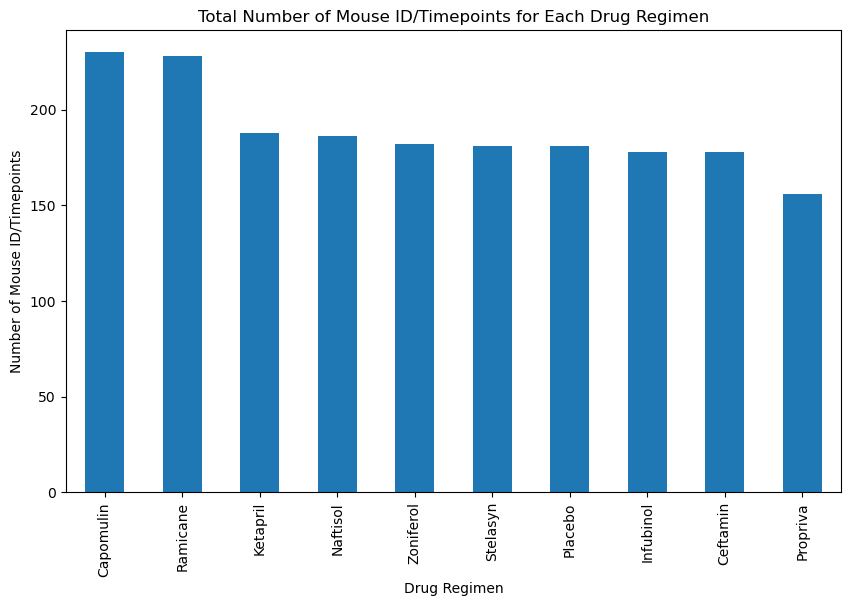

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_counts = clean_combined_data['Drug Regimen'].value_counts()
drug_regimen_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mouse ID/Timepoints')
plt.title('Total Number of Mouse ID/Timepoints for Each Drug Regimen')
plt.show()


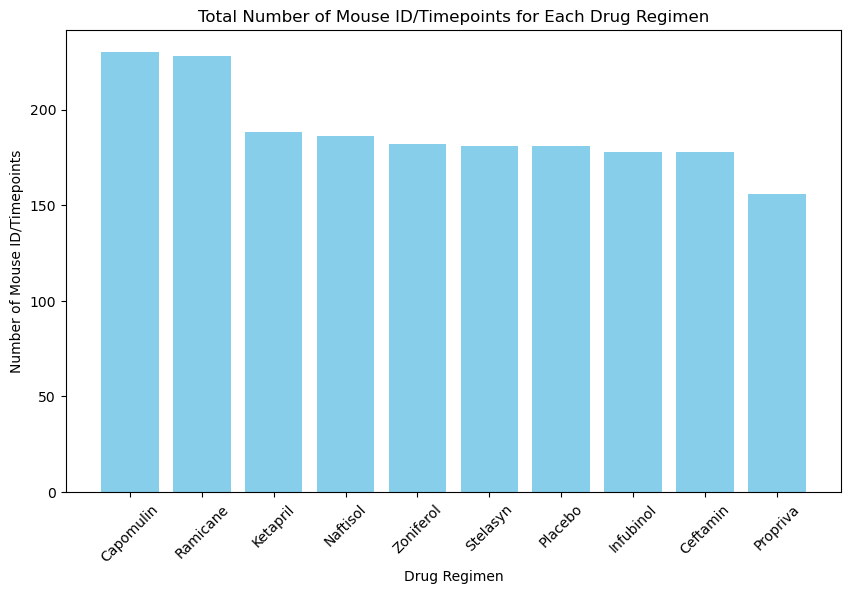

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen_counts = clean_combined_data['Drug Regimen'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(drug_regimen_counts.index, drug_regimen_counts.values, color='skyblue')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mouse ID/Timepoints')
plt.title('Total Number of Mouse ID/Timepoints for Each Drug Regimen')
plt.xticks(rotation=45)
plt.show()


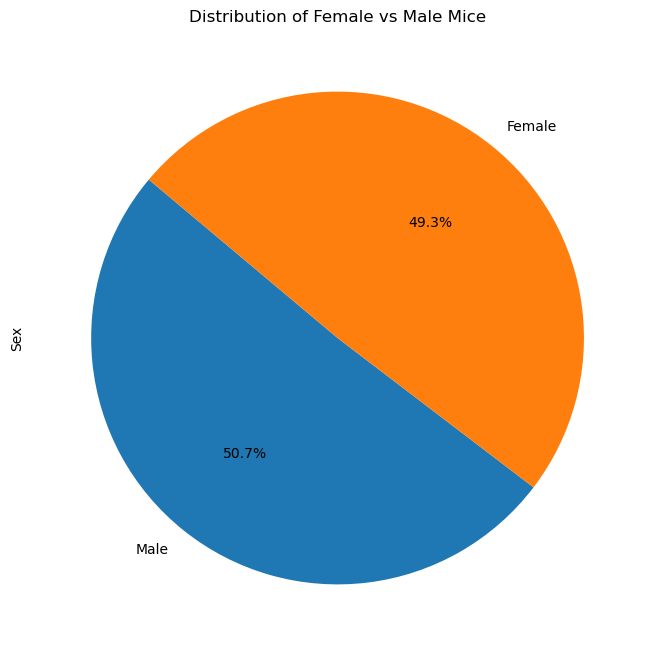

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_distribution = clean_combined_data['Sex'].value_counts()
sex_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, figsize=(8, 8))
plt.title('Distribution of Female vs Male Mice')
plt.show()


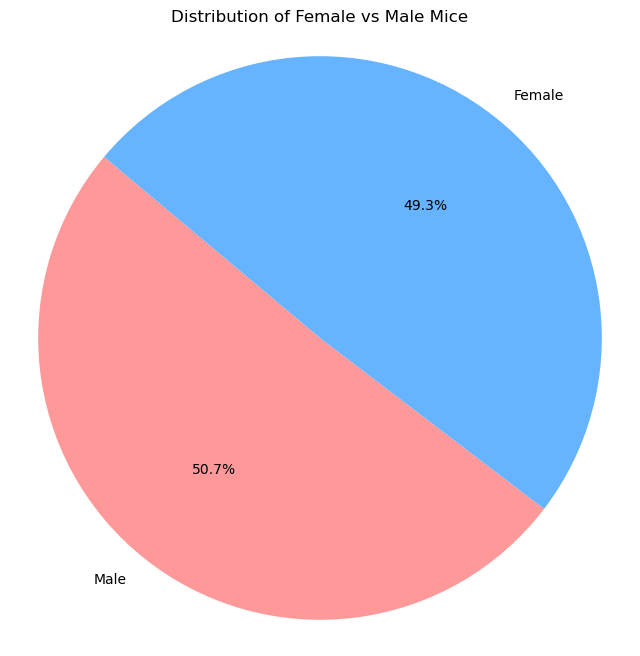

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_distribution = clean_combined_data['Sex'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sex_distribution, labels=sex_distribution.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Distribution of Female vs Male Mice')
plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volumes = clean_combined_data[clean_combined_data['Drug Regimen'].isin(selected_regimens)]

# Start by getting the last (greatest) timepoint for each mouse
latest_timepoints = final_tumor_volumes.groupby('Mouse ID')['Timepoint'].max().reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volumes = pd.merge(latest_timepoints, final_tumor_volumes, on=['Mouse ID', 'Timepoint'], how='left')[['Mouse ID', 'Tumor Volume (mm3)']]
final_tumor_volumes.reset_index(drop=True, inplace=True)
print(final_tumor_volumes)


   Mouse ID  Tumor Volume (mm3)
0      a203           67.973419
1      a251           65.525743
2      a275           62.999356
3      a411           38.407618
4      a444           43.047543
..      ...                 ...
95     y769           68.594745
96     y793           31.896238
97     y865           64.729837
98     z578           30.638696
99     z581           62.754451

[100 rows x 2 columns]


In [31]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    

    
    # Locate the rows which contain mice on each drug and get the tumor volumes


    
    # add subset 


    
    # Determine outliers using upper and lower bounds


KeyError: 'Drug Regimen'

In [30]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.



tumor_vol_data = [final_tumor_volumes[final_tumor_volumes['Drug Regimen'] == treatment]['Tumor Volume (mm3)'] for treatment in treatments]


fig, ax = plt.subplots()


ax.boxplot(tumor_vol_data, labels=treatments)


ax.set_xlabel('Treatment Regimen')
ax.set_ylabel('Final Tumor Volume (mm3)')
ax.set_title('Distribution of Tumor Volume for Each Treatment Group')

plt.show()



KeyError: 'Drug Regimen'

## Line and Scatter Plots

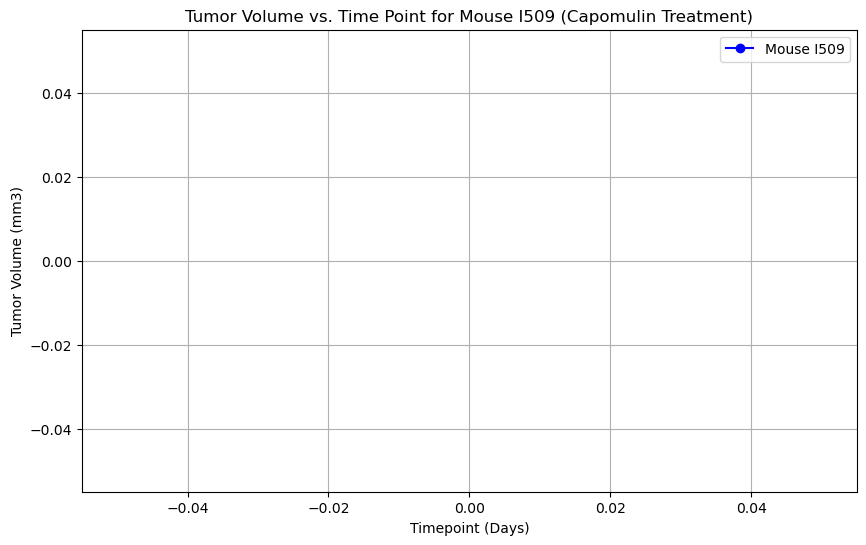

In [27]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 'I509'

single_mouse_data = clean_combined_data[(clean_combined_data['Mouse ID'] == mouse_id) & (clean_combined_data['Drug Regimen'] == 'Capomulin')]
plt.figure(figsize=(10, 6))

plt.plot(single_mouse_data['Timepoint'], single_mouse_data['Tumor Volume (mm3)'], marker='o', color='blue', label=f'Mouse {mouse_id}')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id} (Capomulin Treatment)')
plt.legend()
plt.grid(True)
plt.show()

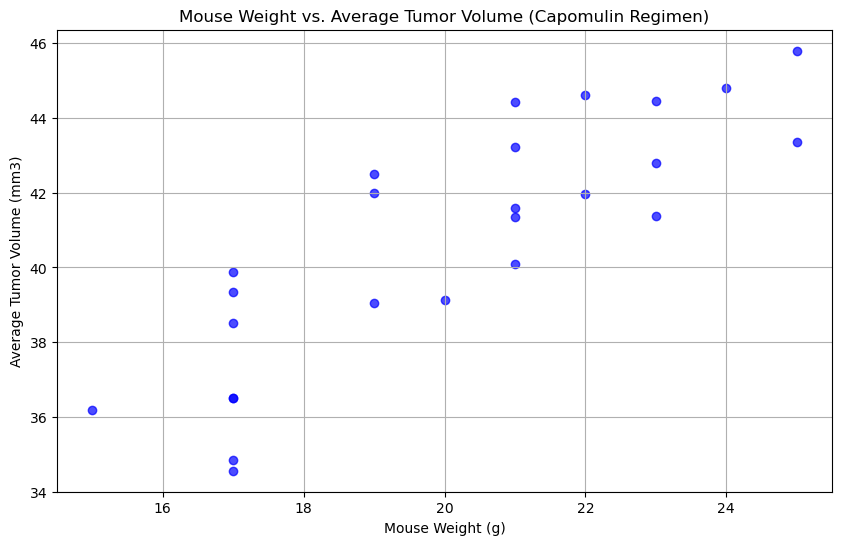

In [23]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_combined_data[clean_combined_data['Drug Regimen'] == 'Capomulin']
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].first()
plt.figure(figsize=(10, 6))
plt.scatter(mouse_weights, avg_tumor_volume, color='blue', alpha=0.7)
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.grid(True)
plt.show()


## Correlation and Regression

In [24]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress
correlation_coefficient = mouse_weights.corr(avg_tumor_volume)
slope, intercept, r_value, p_value, std_err = linregress(mouse_weights, avg_tumor_volume)
print(f'Correlation Coefficient: {correlation_coefficient:.2f}')
print(f'Linear Regression Model:')
print(f'Slope (m): {slope:.2f}')
print(f'Intercept (b): {intercept:.2f}')
print(f'R-squared value: {r_value**2:.2f}')
print(f'p-value: {p_value:.2f}')


Correlation Coefficient: 0.84
Linear Regression Model:
Slope (m): 0.95
Intercept (b): 21.55
R-squared value: 0.71
p-value: 0.00
